In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../3_KNN/Iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
?sns.pairplot

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

/home/max/Udemy/Udemy/machine_learning_classification_bootcamp_in_python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/max/Udemy/Udemy/machine_learning_classification_bootcamp_in_python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/max/Udemy/Udemy/machine_learning_classification_bootcamp_in_python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/max/Udemy/Udemy/machine_learning_classification_bootcamp_in_python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: Us

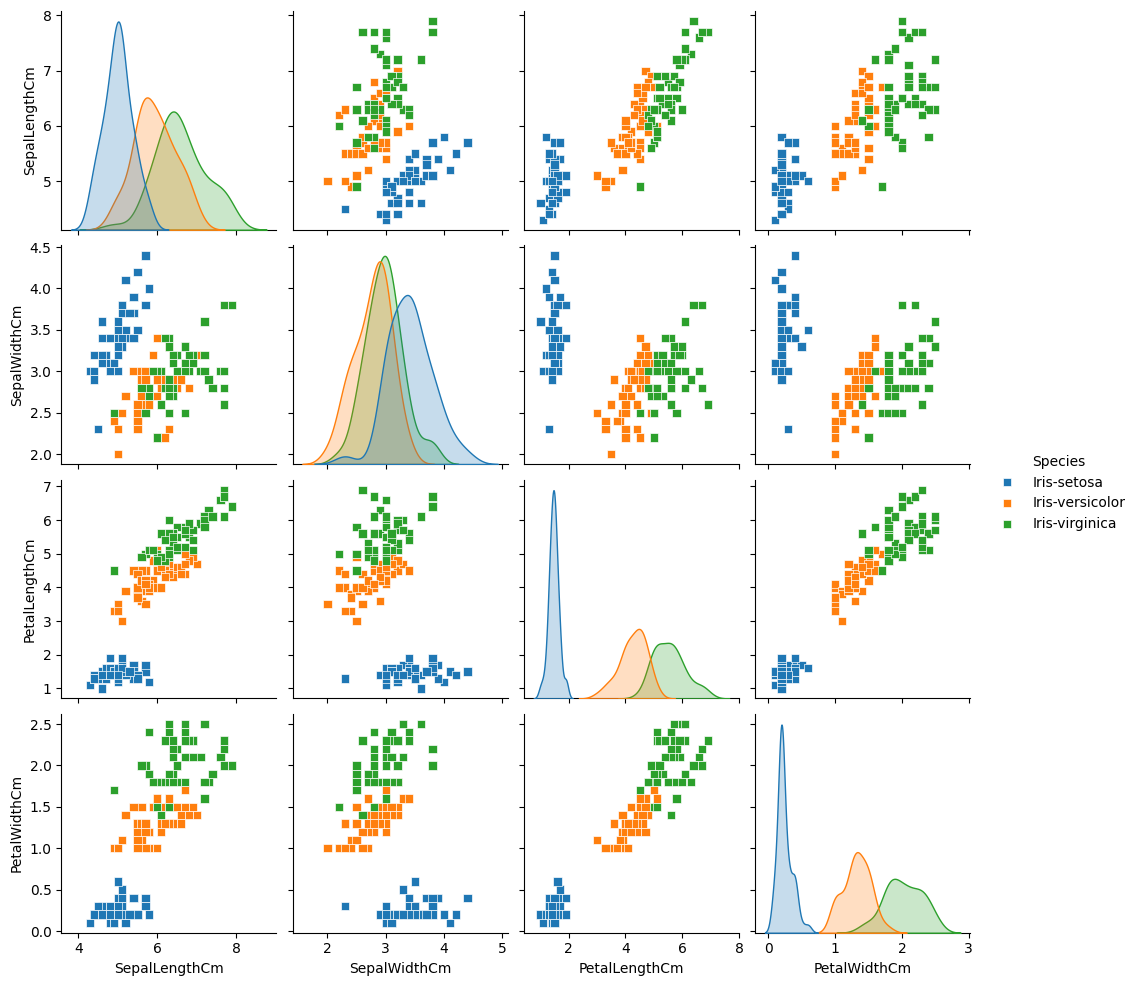

In [17]:
sns.pairplot(df, hue='Species', markers=['s'])

In [18]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
df['Species']=le.fit_transform(df.Species)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
X = df.iloc[:,:2].values
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [32]:
y = df.Species.values
y[:5]

array([0, 0, 0, 0, 0])

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [35]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 2), (120,), (30, 2), (30,))

In [39]:
np.bincount(y)

array([50, 50, 50])

In [41]:
np.bincount(y_train)

array([40, 40, 40])

In [42]:
np.bincount(y_test)

array([10, 10, 10])

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
GNB = GaussianNB()

In [45]:
GNB.fit(X_train, y_train)
y_test_predict = GNB.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

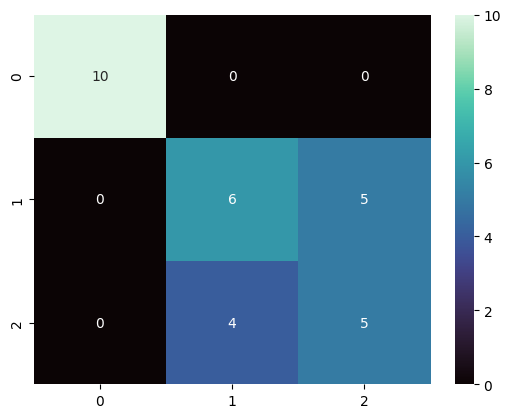

In [47]:
cm = confusion_matrix(y_test_predict, y_test)
sns.heatmap(cm, annot=True, cmap='mako')

In [48]:
from matplotlib.colors import ListedColormap

In [ ]:
X_set, y_set = X_train, y_train

cmap = ListedColormap(colors)




plt.cotourf(X1, X2, Z, alpha=0.5, cmap=cmap)